In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import random
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import random

In [2]:
GRFx = pd.read_csv('Data/GRFx.csv', header = None)
GRFy = pd.read_csv('Data/GRFy.csv', header = None)
GRFz = pd.read_csv('Data/GRFz.csv', header = None)

In [3]:
GRFx = GRFx.loc[:, (GRFx != 0).any(axis = 0)]
GRFy = GRFy.loc[:, (GRFy != 0).any(axis = 0)]
GRFz = GRFz.loc[:, (GRFz != 0).any(axis = 0)]
df = GRFx.values
df.shape

(15696, 1300)

In [4]:
# split train_test data
random.seed(10)
train, test, train_check, test_check = train_test_split(df, df, test_size = .2)

In [5]:
# this is the dimension of the original space
input_dim = train.shape[1]
# this is the dimension of the latent space (encoding space)
latent_dim = 8

# building the autoencoder
encoder = Sequential([
    Dense(128, activation='relu', input_shape=(input_dim,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(latent_dim, activation='relu')
])

decoder = Sequential([
    Dense(16, activation='relu', input_shape=(latent_dim,)),
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(input_dim, activation=None)
])

autoencoder = Model(inputs=encoder.input, outputs=decoder(encoder.output))
autoencoder.compile(loss='mse', optimizer='adam', metrics = ['mae'])
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_input (InputLayer)    [(None, 1300)]            0         
                                                                 
 dense (Dense)               (None, 128)               166528    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 sequential_1 (Sequential)   (None, 1300)              178820

In [6]:
es = EarlyStopping(monitor = 'val_loss', 
                  mode = 'min', 
                  verbose = 1, 
                  patience = 10)
mc = ModelCheckpoint('best_model.h5', 
                     monitor='val_accuracy', 
                     mode='max', 
                     verbose=1, 
                     save_best_only=True)
model_history = autoencoder.fit(train, train_check, 
                                epochs=200, 
                                batch_size=32, 
                                validation_split = .2, 
                                verbose=1,
                                callbacks = [es, mc])

Epoch 1/200
314/314 [==============================] - 2s 3ms/step - loss: 431.9623 - mae: 11.0074 - val_loss: 138.3969 - val_mae: 7.0616
Epoch 2/200
314/314 [==============================] - 1s 3ms/step - loss: 127.8238 - mae: 6.7495 - val_loss: 104.8374 - val_mae: 6.0530
Epoch 3/200
314/314 [==============================] - 1s 3ms/step - loss: 101.9119 - mae: 6.0143 - val_loss: 96.2910 - val_mae: 5.8498
Epoch 4/200
314/314 [==============================] - 1s 3ms/step - loss: 95.7204 - mae: 5.8458 - val_loss: 90.8435 - val_mae: 5.6847
Epoch 5/200
314/314 [==============================] - 1s 3ms/step - loss: 93.4576 - mae: 5.7965 - val_loss: 90.0635 - val_mae: 5.7843
Epoch 6/200
314/314 [==============================] - 1s 3ms/step - loss: 75.9250 - mae: 5.2361 - val_loss: 67.5143 - val_mae: 4.7996
Epoch 7/200
314/314 [==============================] - 1s 3ms/step - loss: 67.4443 - mae: 4.8483 - val_loss: 66.9772 - val_mae: 4.7599
Epoch 8/200
314/314 [============================

314/314 [==============================] - 1s 3ms/step - loss: 42.9122 - mae: 3.6702 - val_loss: 45.3379 - val_mae: 3.7962
Epoch 29/200
314/314 [==============================] - 1s 3ms/step - loss: 42.7822 - mae: 3.6677 - val_loss: 44.4861 - val_mae: 3.7315
Epoch 30/200
314/314 [==============================] - 1s 3ms/step - loss: 42.4282 - mae: 3.6458 - val_loss: 44.3842 - val_mae: 3.7772
Epoch 31/200
314/314 [==============================] - 1s 3ms/step - loss: 44.1040 - mae: 3.7413 - val_loss: 45.3073 - val_mae: 3.7812
Epoch 32/200
314/314 [==============================] - 1s 3ms/step - loss: 42.9565 - mae: 3.6676 - val_loss: 44.9712 - val_mae: 3.7429
Epoch 33/200
314/314 [==============================] - 1s 3ms/step - loss: 43.7170 - mae: 3.7162 - val_loss: 43.5852 - val_mae: 3.6560
Epoch 34/200
314/314 [==============================] - 1s 3ms/step - loss: 42.4348 - mae: 3.6425 - val_loss: 43.6115 - val_mae: 3.7285
Epoch 35/200
314/314 [==============================] - 1s 3m

Epoch 56/200
314/314 [==============================] - 1s 3ms/step - loss: 41.3397 - mae: 3.5634 - val_loss: 42.1573 - val_mae: 3.5807
Epoch 57/200
314/314 [==============================] - 1s 3ms/step - loss: 41.1886 - mae: 3.5619 - val_loss: 41.8021 - val_mae: 3.5701
Epoch 58/200
314/314 [==============================] - 1s 3ms/step - loss: 41.3061 - mae: 3.5684 - val_loss: 42.7501 - val_mae: 3.6648
Epoch 59/200
314/314 [==============================] - 1s 3ms/step - loss: 41.5184 - mae: 3.5773 - val_loss: 41.8128 - val_mae: 3.5885
Epoch 60/200
314/314 [==============================] - 1s 3ms/step - loss: 41.5368 - mae: 3.5789 - val_loss: 41.4434 - val_mae: 3.5386
Epoch 61/200
314/314 [==============================] - 1s 3ms/step - loss: 41.9425 - mae: 3.6119 - val_loss: 42.1342 - val_mae: 3.5549
Epoch 62/200
314/314 [==============================] - 1s 3ms/step - loss: 41.2482 - mae: 3.5564 - val_loss: 42.0701 - val_mae: 3.5929
Epoch 63/200
314/314 [==========================

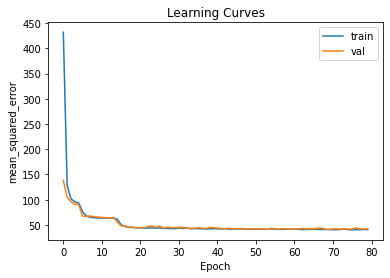

In [7]:
from matplotlib import pyplot
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('mean_squared_error')
pyplot.plot(model_history.history['loss'], label='train')
pyplot.plot(model_history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

In [8]:
reconstruct_train = autoencoder.predict(train)
reconstruct_test = autoencoder.predict(test)
compressed_train = encoder.predict(train)
compressed_test = encoder.predict(test)

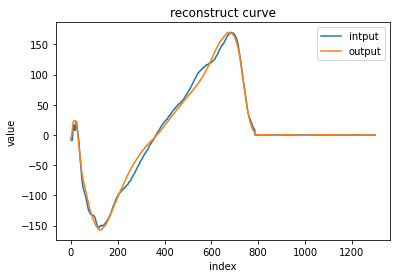

In [9]:
# reconstruct_test[1, :]
i = 207
pyplot.title('reconstruct curve')
pyplot.xlabel('index')
pyplot.ylabel('value')
pyplot.plot(test[i, :], label='intput')
pyplot.plot(reconstruct_test[i, :], label='output')
pyplot.legend()
pyplot.show()

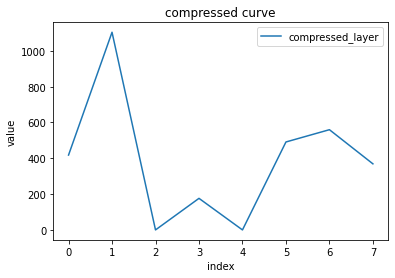

In [10]:
pyplot.title('compressed curve')
pyplot.xlabel('index')
pyplot.ylabel('value')
pyplot.plot(compressed_test[i, :], label='compressed_layer')
pyplot.legend()
pyplot.show()

In [11]:
###########################################################################

In [12]:
# this is the dimension of the original space
input_dim = train.shape[1]
# this is the dimension of the latent space (encoding space)
latent_dim = 16

# building the autoencoder
encoder = Sequential([
    Dense(128, activation='relu', input_shape=(input_dim,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(latent_dim, activation='relu')
])

decoder = Sequential([
    Dense(32, activation='relu', input_shape=(latent_dim,)),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(input_dim, activation=None)
])

autoencoder = Model(inputs=encoder.input, outputs=decoder(encoder.output))
autoencoder.compile(loss='mse', optimizer='adam', metrics = ['mae'])
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10_input (InputLayer)  [(None, 1300)]           0         
                                                                 
 dense_10 (Dense)            (None, 128)               166528    
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 sequential_3 (Sequential)   (None, 1300)              178676    
                                                                 
Total params: 356,068
Trainable params: 356,068
Non-trainab

In [13]:
es = EarlyStopping(monitor = 'val_loss', 
                  mode = 'min', 
                  verbose = 1, 
                  patience = 10)
mc = ModelCheckpoint('best_model.h5', 
                     monitor='val_accuracy', 
                     mode='max', 
                     verbose=1, 
                     save_best_only=True)
model_history = autoencoder.fit(train, train_check, 
                                epochs=200, 
                                batch_size=32, 
                                validation_split = .2, 
                                verbose=1,
                                callbacks = [es, mc])

Epoch 1/200
314/314 [==============================] - 2s 3ms/step - loss: 338.8223 - mae: 9.8132 - val_loss: 101.5915 - val_mae: 6.3362
Epoch 2/200
314/314 [==============================] - 1s 3ms/step - loss: 77.2933 - mae: 5.4195 - val_loss: 63.2322 - val_mae: 4.8807
Epoch 3/200
314/314 [==============================] - 1s 3ms/step - loss: 54.5233 - mae: 4.4123 - val_loss: 54.0402 - val_mae: 4.4171
Epoch 4/200
314/314 [==============================] - 1s 3ms/step - loss: 48.1187 - mae: 4.1030 - val_loss: 45.5603 - val_mae: 3.9554
Epoch 5/200
314/314 [==============================] - 1s 3ms/step - loss: 43.3348 - mae: 3.8666 - val_loss: 42.1935 - val_mae: 3.7947
Epoch 6/200
314/314 [==============================] - 1s 3ms/step - loss: 37.0440 - mae: 3.6082 - val_loss: 34.3328 - val_mae: 3.4996
Epoch 7/200
314/314 [==============================] - 1s 3ms/step - loss: 31.8617 - mae: 3.3858 - val_loss: 32.7884 - val_mae: 3.3790
Epoch 8/200
314/314 [==============================] 

314/314 [==============================] - 1s 3ms/step - loss: 14.2864 - mae: 2.2745 - val_loss: 15.6153 - val_mae: 2.3923
Epoch 29/200
314/314 [==============================] - 1s 3ms/step - loss: 13.4545 - mae: 2.1983 - val_loss: 13.6842 - val_mae: 2.2032
Epoch 30/200
314/314 [==============================] - 1s 3ms/step - loss: 13.8703 - mae: 2.2345 - val_loss: 14.1652 - val_mae: 2.2181
Epoch 31/200
314/314 [==============================] - 1s 3ms/step - loss: 13.8567 - mae: 2.2285 - val_loss: 13.6095 - val_mae: 2.1734
Epoch 32/200
314/314 [==============================] - 1s 3ms/step - loss: 13.7274 - mae: 2.2207 - val_loss: 13.3780 - val_mae: 2.1828
Epoch 33/200
314/314 [==============================] - 1s 3ms/step - loss: 13.2605 - mae: 2.1814 - val_loss: 13.3722 - val_mae: 2.1785
Epoch 34/200
314/314 [==============================] - 1s 3ms/step - loss: 13.9762 - mae: 2.2365 - val_loss: 12.9564 - val_mae: 2.1118
Epoch 35/200
314/314 [==============================] - 1s 3m

Epoch 56/200
314/314 [==============================] - 1s 3ms/step - loss: 12.3398 - mae: 2.0928 - val_loss: 12.1970 - val_mae: 2.0611
Epoch 57/200
314/314 [==============================] - 1s 3ms/step - loss: 12.5642 - mae: 2.1145 - val_loss: 17.2004 - val_mae: 2.4887
Epoch 58/200
314/314 [==============================] - 1s 3ms/step - loss: 12.4585 - mae: 2.0986 - val_loss: 12.3704 - val_mae: 2.0779
Epoch 59/200
314/314 [==============================] - 1s 3ms/step - loss: 12.0625 - mae: 2.0655 - val_loss: 13.4132 - val_mae: 2.1773
Epoch 60/200
314/314 [==============================] - 1s 3ms/step - loss: 11.9882 - mae: 2.0566 - val_loss: 12.5458 - val_mae: 2.0674
Epoch 61/200
314/314 [==============================] - 1s 3ms/step - loss: 12.3579 - mae: 2.1000 - val_loss: 12.2189 - val_mae: 2.0247
Epoch 62/200
314/314 [==============================] - 1s 3ms/step - loss: 12.0593 - mae: 2.0591 - val_loss: 14.4744 - val_mae: 2.2477
Epoch 63/200
314/314 [==========================

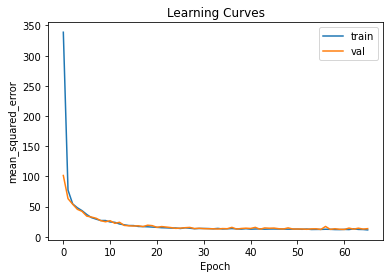

In [14]:
from matplotlib import pyplot
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('mean_squared_error')
pyplot.plot(model_history.history['loss'], label='train')
pyplot.plot(model_history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

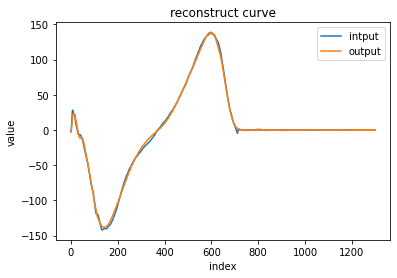

In [31]:
reconstruct_train = autoencoder.predict(train)
reconstruct_test = autoencoder.predict(test)
compressed_train = encoder.predict(train)
compressed_test = encoder.predict(test)
# reconstruct_test[1, :]
i = 203
pyplot.title('reconstruct curve')
pyplot.xlabel('index')
pyplot.ylabel('value')
pyplot.plot(test[i, :], label='intput')
pyplot.plot(reconstruct_test[i, :], label='output')
pyplot.legend()
pyplot.show()

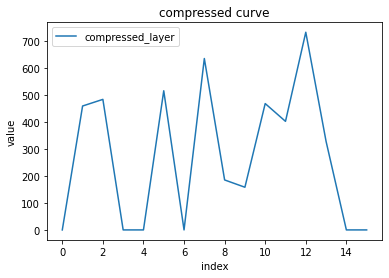

In [30]:
pyplot.title('compressed curve')
pyplot.xlabel('index')
pyplot.ylabel('value')
pyplot.plot(compressed_test[i, :], label='compressed_layer')
pyplot.legend(loc ="upper left")
pyplot.show()